# Logistic regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
def plot_confusion_matrix(cm, y_true):
    """
    Plots the confusion matrix using a heatmap.

    Args:
        cm (np.ndarray): The confusion matrix.
        y_true (np.ndarray): The true labels for the test data.
    """
    # Create the plot using pure matplotlib
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Use imshow to create the heatmap
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the unique class names
           xticklabels=np.unique(y_true), yticklabels=np.unique(y_true),
           title='Confusion Matrix',
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()

In [13]:
# Read in processed data
file_path = '/Users/ruthwalters/Library/CloudStorage/Dropbox/FALL 2025/Machine learning/Projects/proj1/data/processed_data/processed_project_adult.csv'
data = pd.read_csv(file_path, index_col=0)

# Separate target values
X = data.drop(columns=['income'], axis=1)
y = data[['income']]

# Split data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Initialize the model with default parameters
model = LogisticRegression(solver='lbfgs', random_state=42, max_iter=200)
model.fit(X_train, y_train.values.ravel())

# Make predictions on the scaled test set
y_pred = model.predict(X_test)


--- Confusion Matrix ---
[[4662  283]
 [ 854  713]]

--- Classification Report ---
              precision    recall  f1-score   support

       <=50K       0.85      0.94      0.89      4945
        >50K       0.72      0.46      0.56      1567

    accuracy                           0.83      6512
   macro avg       0.78      0.70      0.72      6512
weighted avg       0.81      0.83      0.81      6512



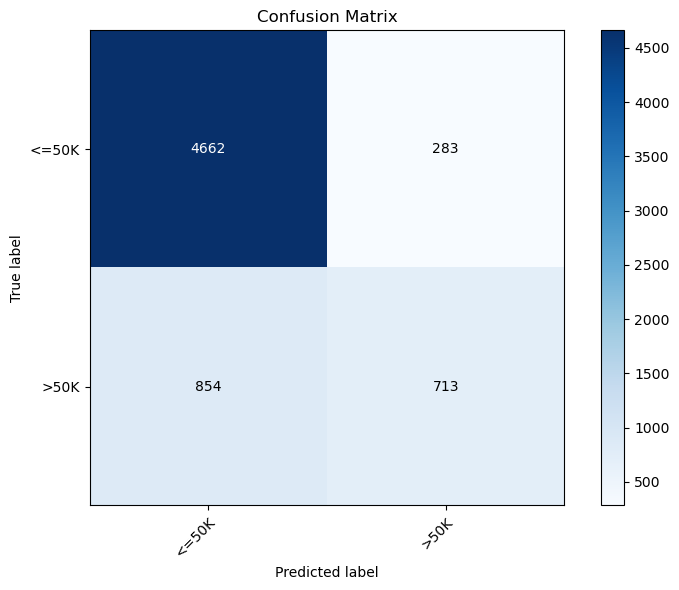

In [14]:
# Generate and display the confusion matrix and classification report
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

# Plot the predictions and the confusion matrix
plot_confusion_matrix(cm, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits

--- Best Model Found by GridSearchCV ---
Best parameters: {'C': 11.288378916846883}
Best cross-validation accuracy: 0.8258

 Final evaluation of the best model on the test set...
Final accuracy on test set: 0.8254

Classification Report:
              precision    recall  f1-score   support

       <=50K       0.85      0.94      0.89      4945
        >50K       0.72      0.46      0.56      1567

    accuracy                           0.83      6512
   macro avg       0.78      0.70      0.72      6512
weighted avg       0.81      0.83      0.81      6512


Confusion Matrix:
[[4662  283]
 [ 854  713]]


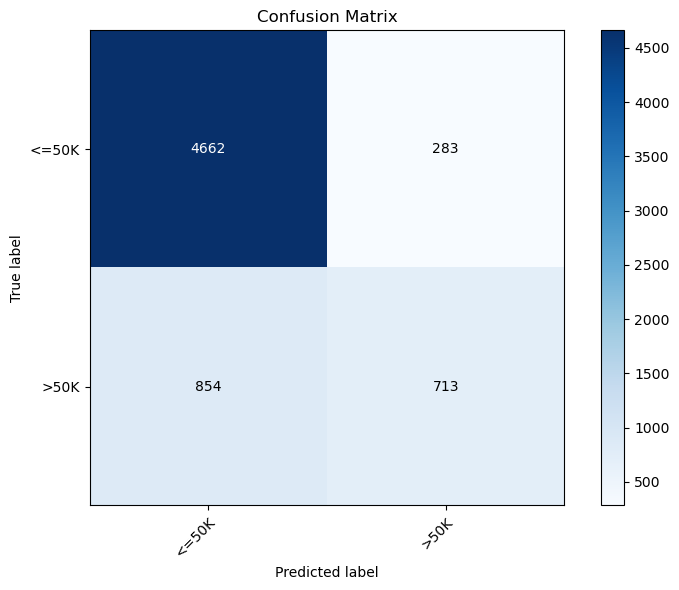

In [17]:

# Define the parameter grid to search over.
param_grid = {
    'C': np.logspace(-4, 4, 20),  # Inverse of regularization strength
}

# Initialize GridSearchCV with a 5-fold cross-validation strategy.
grid_search = GridSearchCV(
    estimator=LogisticRegression(solver='lbfgs', random_state=42, max_iter=500),
    param_grid=param_grid,
    cv=5,                     # 5-fold cross-validation
    scoring='accuracy',       # Metric to optimize for
    n_jobs=-1,                # Use all available CPU cores
    verbose=1                 # Print progress
)

grid_search.fit(X_train, y_train.values.ravel())

# Get the best estimator from the search.
best_model = grid_search.best_estimator_

print("\n--- Best Model Found by GridSearchCV ---")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

print("\n Final evaluation of the best model on the test set...")
# Predict using the best model found during the search.
final_y_pred = best_model.predict(X_test)
final_accuracy = accuracy_score(y_test, final_y_pred)

print(f"Final accuracy on test set: {final_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, final_y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, final_y_pred)
print(cm)

# Plot the predictions and the confusion matrix
plot_confusion_matrix(cm, y_test)